<a href="https://colab.research.google.com/github/git-siddhesh/Jax_implementation_learning/blob/main/Assignment_JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# %pip install jax
import jax.numpy as jnp
from jax.scipy.linalg import cholesky
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from jax.numpy.linalg import cholesky
from jax.scipy.linalg import inv
from scipy.stats import multivariate_normal
import jax
import pandas as pd
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import torch
dist = torch.distributions
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# learning reference : 
https://mmuratarat.github.io/2019-10-05/univariate-multivariate_gaussian


In [ ]:
def multivariate_normal(x, d, mean, covariance):
    """pdf of the multivariate normal distribution."""
    x_m = x - mean
    return (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))

In [ ]:
# Plot bivariate distribution
def generate_surface(mean, covariance, d):
    """Helper function to generate density surface."""
    nb_of_x = 100 # grid size
    x1s = np.linspace(-5, 5, num=nb_of_x)
    x2s = np.linspace(-5, 5, num=nb_of_x)
    print(x1s)
    print(x2s)
    x1, x2 = np.meshgrid(x1s, x2s) # Generate grid
    print(x1)
    print(x2)
    pdf = np.zeros((nb_of_x, nb_of_x))
    print(pdf)
    # Fill the cost matrix for each combination of weights
    for i in range(nb_of_x):
        for j in range(nb_of_x):
            pdf[i,j] = multivariate_normal(
                np.matrix([[x1[i,j]], [x2[i,j]]]), 
                d, mean, covariance)
    return x1, x2, pdf  # x1, x2, pdf(x1,x2)

In [ ]:
 






# subplot
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
d = 2  # number of dimensions

# Plot of independent Normals
bivariate_mean = np.matrix([[0.], [0.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.], 
    [0., 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax1.contourf(x1, x2, p, 100, cmap='rainbow')
ax1.set_xlabel('$x_1$', fontsize=13)
ax1.set_ylabel('$x_2$', fontsize=13)
ax1.axis([-2.5, 2.5, -2.5, 2.5])
ax1.set_aspect('equal')
ax1.set_title('Independent variables', fontsize=12)

# Plot of correlated Normals
bivariate_mean = np.matrix([[0.], [1.]])  # Mean
bivariate_covariance = np.matrix([
    [1., 0.8], 
    [0.8, 1.]])  # Covariance
x1, x2, p = generate_surface(
    bivariate_mean, bivariate_covariance, d)
# Plot bivariate distribution
con = ax2.contourf(x1, x2, p, 100, cmap='rainbow')
ax2.set_xlabel('$x_1$', fontsize=13)
ax2.set_ylabel('$x_2$', fontsize=13)
ax2.axis([-2.5, 2.5, -1.5, 3.5])
ax2.set_aspect('equal')
ax2.set_title('Correlated variables', fontsize=12)

# Add colorbar and title
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
cbar = fig.colorbar(con, cax=cbar_ax)
cbar.ax.set_ylabel('$p(x_1, x_2)$', fontsize=13)
plt.suptitle('Bivariate normal distributions', fontsize=13, y=0.95)
plt.savefig('Bivariate_normal_distributon')
plt.show()

# Univariate normal distribution 

Using standard normal variable having mean = 0, variance = 1

In [3]:
def univariate(dataX, meanX=0, varianceX = 1):
  num =  jnp.exp( -0.5*( (dataX-meanX)**2/varianceX ) )
  denom = (jnp.sqrt(2*jnp.pi*varianceX))
  return  num/denom
  

(250,) (250,)


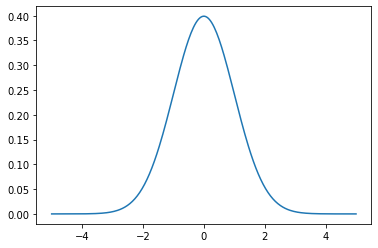

In [7]:
x1 = jnp.linspace(-5,5,250)   # taking 100 sampling points = 100, range(-5,5)
# print(x1)
y1 = univariate(x1,0,1)
# print(y1)
print(x1.shape,y1.shape)
plt.plot(x1,y1)


In [ ]:
mu1 = widgets.FloatSlider(value = 0, min =-3, max = 3, description = "Mean")
var1 = widgets.FloatSlider(value = 1, min =0, max = 2, description = "Variance")

from IPython.display import display
from ipywidgets import interact, fixed

display(mu1)
display(var1)
